## Let us analyse the data given first

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


sns.set()
pd.set_option('display.max_columns', 500)

#### Importing data

In [2]:
b = pd.read_csv('day.csv')

#### Let us understand the data now

In [3]:
b.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
b.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
b.shape
#there are 730 rows and 16 columns

(730, 16)

In [6]:
b.isnull().sum()
#there are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#let us quickly understand the datatype
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
b.nunique().sort_values()
#unique values in acceptable range as per variables

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

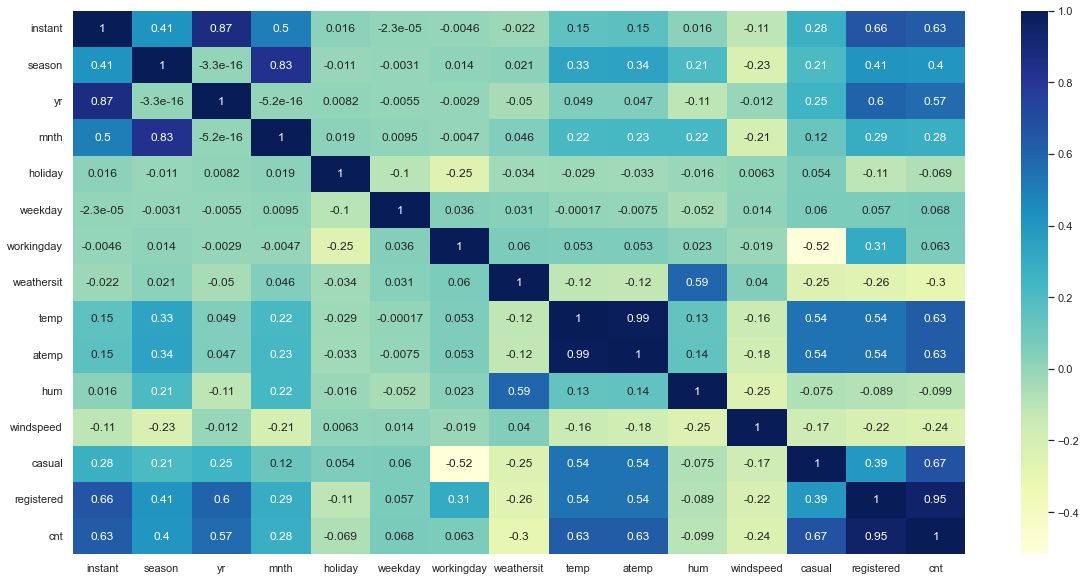

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(b.corr(), cmap='YlGnBu', annot = True)
plt.show()

# there are certain variables that have collinearity, we will deal with them soon

#### Dropping unnecessary columns

In [10]:
#instant is just like an index, we dont need it
#dteday is not needed we already have 'mnth' and 'yr'
#let us drop holiday as we have a column workingday
#column 'cnt' is just summation of casual and registered, so dropping them too

b.drop(['instant','dteday','holiday','casual','registered'],axis=1,inplace=True)
b.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
b.shape
# we have reduced number of columns to 11 now

(730, 11)

#### Variable Mapping, as per problem statement

In [12]:
b['season']=b.season.map({1:'spring',2:'summer',3:'fall',4:'winter' })
b['mnth']=b.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
b['weathersit']=b.weathersit.map({1:'clear',2:'mist and cloudy',3:'light snow',4:'snow and fog'})
b['weekday']=b.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
b.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,sat,0,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,sun,0,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
print(b.columns)

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


#### Data Visualization

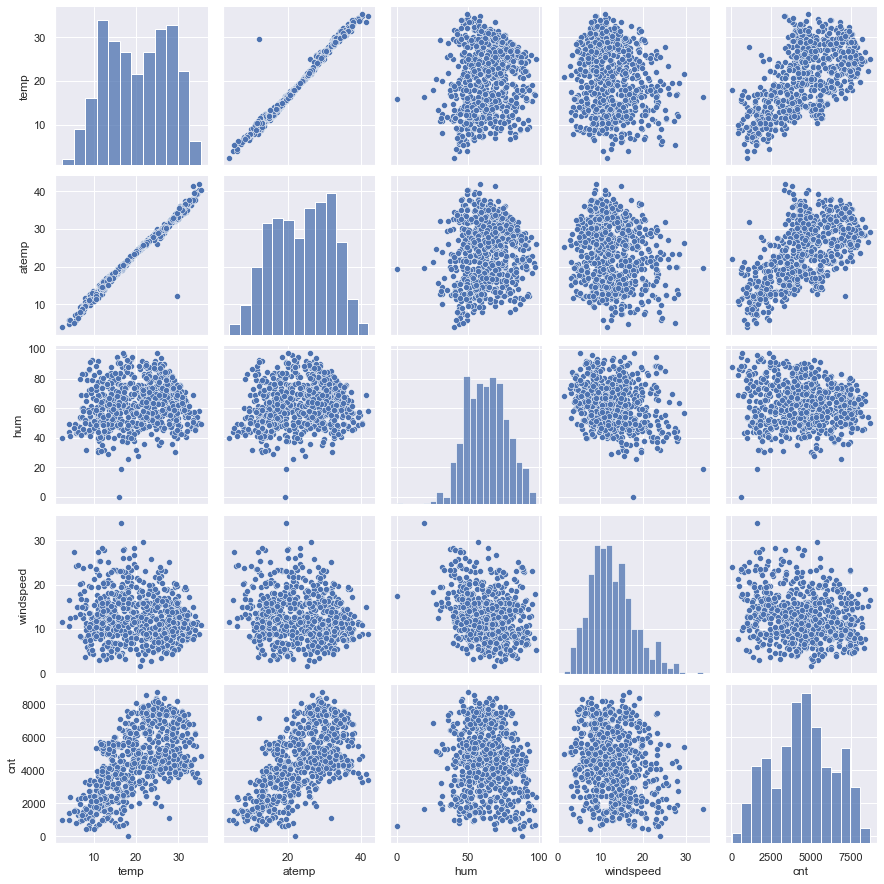

In [15]:
sns.pairplot(b, vars=['temp','atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

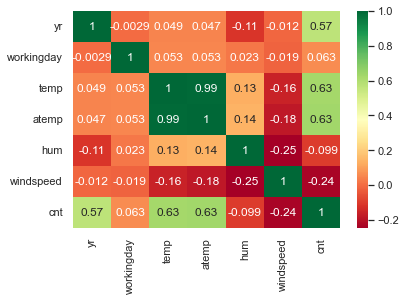

In [16]:
sns.heatmap(b.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [17]:
#atemp and temp co relates to 0.99 hence lets drop atemp

b.drop(['atemp'],axis=1,inplace=True)
b.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,wed,1,clear,9.305237,43.6957,12.522300,1600


In [18]:
b.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,wed,1,clear,9.305237,43.6957,12.522300,1600


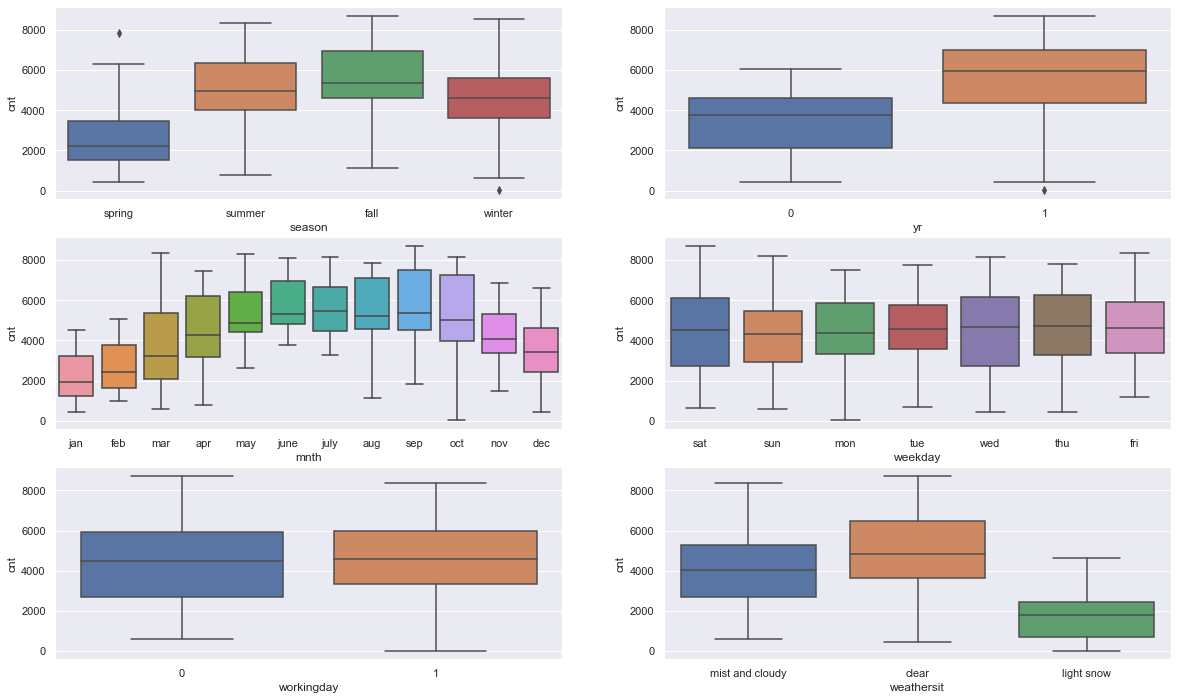

In [19]:
# Visualising categorical vars

plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = b)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = b)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = b)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = b)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = b)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = b)

plt.show()


#### Observation

People are likely to rent more on :

Fall season, then in summer than rest two seasons

in 2019 compared than 2018

Wednesday, Thursday and Saturday

Clear day

## Univariate Analysis

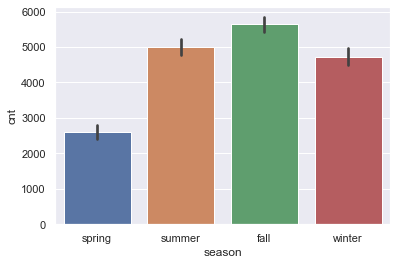

In [20]:
#season

sns.barplot('season','cnt',data=b)
plt.show()

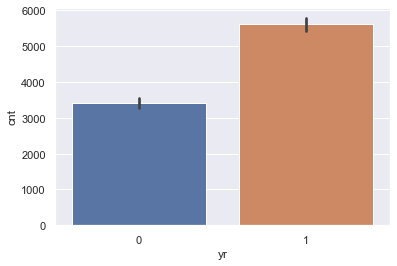

In [21]:
#yr

sns.barplot('yr','cnt',data=b)
plt.show()

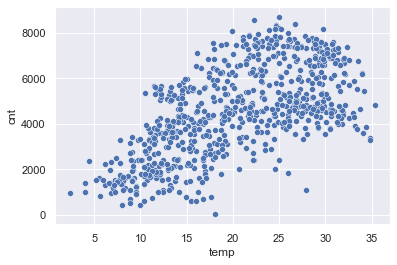

In [22]:
#temp

sns.scatterplot(x='temp', y='cnt' , data=b)
plt.show()

# with higher temperature renting has increased

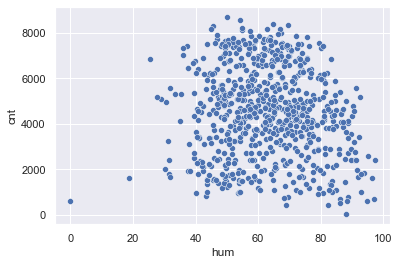

In [23]:
#hum

sns.scatterplot(x='hum', y='cnt',data=b)
plt.show()

# with higher humidity renting has increased

<AxesSubplot:xlabel='cnt', ylabel='Density'>

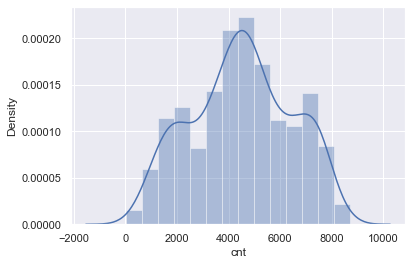

In [24]:
sns.distplot(b['cnt'])

#normally distributed

In [25]:
b.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,wed,1,clear,9.305237,43.6957,12.522300,1600


#### Preparing data

In [26]:
#lets start creating dummies now

mnth = pd.get_dummies(b.mnth , drop_first = True)
weekday = pd.get_dummies(b.weekday , drop_first = True)
weathersit = pd.get_dummies(b.weathersit , drop_first = True)
season = pd.get_dummies(b.season , drop_first = True)

In [27]:
#joinig dummies and the original data 'b'

b = pd.concat([mnth , weekday , weathersit , season , b] , axis=1)
b.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist and cloudy,spring,summer,winter,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,spring,0,jan,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,spring,0,jan,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,jan,mon,1,clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,jan,tue,1,clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,jan,wed,1,clear,9.305237,43.6957,12.522300,1600


In [28]:
#let us drop the variables that were used to create the dummies

b.drop(['season' , 'mnth' , 'weekday' , 'weathersit'] , axis = 1 , inplace = True)
b.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist and cloudy,spring,summer,winter,yr,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,9.305237,43.6957,12.522300,1600


In [29]:
b.shape

#we now have 28 columns

(730, 28)

#### Spliting the data to train set and test set

In [30]:
from sklearn.model_selection import train_test_split

b_train, b_test = train_test_split(b, train_size = 0.7, random_state = 100)

In [31]:
#let us see the number of rows in the train data

b_train.shape

(510, 28)

In [32]:
#let us see the number of rows in the test data

b_test.shape

(220, 28)

#### Re-scaling data

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#in our case, we are using min max scaling

In [34]:
b.columns

Index(['aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'light snow',
       'mist and cloudy', 'spring', 'summer', 'winter', 'yr', 'workingday',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [35]:
num_vars=['temp' , 'hum' , 'windspeed' , 'cnt']
b_train[num_vars] = scaler.fit_transform(b_train[num_vars])
b_train.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist and cloudy,spring,summer,winter,yr,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


In [36]:
#lets visualize data after scaling

b_train.describe()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist and cloudy,spring,summer,winter,yr,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
b_train.shape

(510, 28)

In [38]:
#lets split dependent and independent variable

y_train = b_train.pop('cnt')
X_train = b_train

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Lets build linear model

#### RFE

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

# in our case we are expecting around 50%, i.e 15 columns

In [41]:
#lets look at the RFE output

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 13),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 9),
 ('tue', False, 8),
 ('wed', False, 10),
 ('light snow', True, 1),
 ('mist and cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [42]:
#let us look at the variables that are selected

col = X_train.columns[rfe.support_]
col

Index(['jan', 'july', 'sep', 'sat', 'sun', 'light snow', 'mist and cloudy',
       'spring', 'summer', 'winter', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [43]:
#unselected variables

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'thu',
       'tue', 'wed'],
      dtype='object')

#### lets start with Statsmodel

In [44]:
X_train_rfe = X_train[col]

In [45]:
#adding constant and then fitting the linear model

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()

In [46]:
#visualizing the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.22e-191
Time:                        10:28:46   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1937      0.042     

In [47]:
#Dropping constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
#VIF calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['variables'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,variables,vif
13,hum,32.78
12,temp,19.98
11,workingday,18.57
7,spring,5.04
3,sat,4.95
14,windspeed,4.92
4,sun,4.79
9,winter,3.74
8,summer,3.05
6,mist and cloudy,2.31


In [49]:
# dropping 'hum' as it has high VIF

X_train_1 = X_train_rfe.drop(["hum"], axis = 1)

In [50]:
# linear model creation after dropping 'hum'

X_train_lm1 = sm.add_constant(X_train_1)
lm1 = sm.OLS(y_train,X_train_lm1.astype(float)).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.60e-188
Time:                        10:28:47   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1179      0.039     

In [51]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [52]:
vif = pd.DataFrame()
X = X_train_1
vif['variables'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,variables,vif
11,workingday,16.56
12,temp,13.13
13,windspeed,4.79
3,sat,4.54
4,sun,4.28
7,spring,4.22
9,winter,2.79
8,summer,2.76
10,yr,2.08
0,jan,1.65


In [53]:
# dropping 'workingday' as it has high VIF

X_train_2 = X_train_lm1.drop(["workingday"], axis = 1)

In [54]:
# proceeding without 'workingday' column

X_train_lm2 = sm.add_constant(X_train_2)
lm2 = sm.OLS(y_train,X_train_lm2.astype(float)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.52e-186
Time:                        10:28:47   Log-Likelihood:                 502.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2171      0.030     

In [55]:
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
vif = pd.DataFrame()
X = X_train_2
vif['variables'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,variables,vif
11,temp,5.22
12,windspeed,4.64
7,spring,2.78
8,summer,2.25
10,yr,2.07
9,winter,1.82
0,jan,1.61
1,july,1.60
6,mist and cloudy,1.56
2,sep,1.33


In [57]:
#dropping 'sat' after looking at the high p value and low vif

X_train_3 = X_train_lm2.drop(['sat'],axis=1)

In [58]:
X_train_lm3 = sm.add_constant(X_train_3)
lm3 = sm.OLS(y_train,X_train_lm3.astype(float)).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.42e-187
Time:                        10:28:47   Log-Likelihood:                 501.76
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     497   BIC:                            -922.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2201      0.030     

In [59]:
X_train_lm3 = X_train_lm3.drop(['const'],axis=1)

In [60]:
vif = pd.DataFrame()
X = X_train_3
vif['variables'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,variables,vif
10,temp,5.18
11,windspeed,4.62
6,spring,2.76
7,summer,2.24
9,yr,2.07
8,winter,1.80
0,jan,1.61
1,july,1.59
5,mist and cloudy,1.56
2,sep,1.33


In [61]:
# windspeed's VIF is high with low negative corr, lets drop it

X_train_4= X_train_lm3.drop(['windspeed'], axis=1)

In [62]:
X_train_lm4 = sm.add_constant(X_train_4)
lm4=sm.OLS(y_train,X_train_lm4.astype(float)).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.49e-180
Time:                        10:28:47   Log-Likelihood:                 482.61
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     498   BIC:                            -890.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1625      0.030     

In [63]:
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [64]:
vif = pd.DataFrame()
X = X_train_4
vif['variables'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,variables,vif
10,temp,4.33
9,yr,2.07
6,spring,2.00
7,summer,1.95
0,jan,1.60
1,july,1.59
8,winter,1.59
5,mist and cloudy,1.56
2,sep,1.33
3,sun,1.17


In [65]:
#lets drop jan, as it has high P value

X_train_5 = X_train_lm4.drop(['jan'], axis=1)

In [66]:
X_train_lm5 = sm.add_constant(X_train_5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.80e-181
Time:                        10:28:47   Log-Likelihood:                 481.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1534      0.029     

In [67]:
vif = pd.DataFrame()
X = X_train_5
vif['variables'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,variables,vif
9,temp,4.27
8,yr,2.06
6,summer,1.95
7,winter,1.59
0,july,1.58
4,mist and cloudy,1.55
5,spring,1.40
1,sep,1.33
2,sun,1.17
3,light snow,1.07


In [68]:
# we now have a model with acceptable P value and VIF
# Rsq is also pretty good

In [69]:
X_train_lm5

,const,july,sep,sun,light snow,mist and cloudy,spring,summer,winter,yr,temp
576,1.0,1,0,0,0,0,0,0,0,1,0.815169
426,1.0,0,0,0,0,1,1,0,0,1,0.442393
728,1.0,0,0,1,0,0,1,0,0,1,0.245101
482,1.0,0,0,0,0,1,0,1,0,1,0.395666
111,1.0,0,0,0,0,1,0,1,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,0.202618
350,1.0,0,0,0,0,1,0,0,1,0,0.248216
79,1.0,0,0,0,0,1,0,1,0,0,0.462664


#### Residual analysis

In [70]:
#y train pred

y_train_pred = lm5.predict(X_train_lm5)

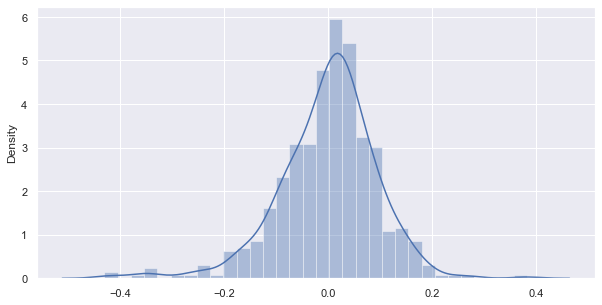

In [71]:
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred))
plt.show()

# the difference is normally distributed

### Prediction

#### Begining with test data

In [72]:
#list creation
num_vars=['temp','hum','windspeed','cnt']

In [73]:
b_test[num_vars] = scaler.transform(b_test[num_vars])
b_test.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist and cloudy,spring,summer,winter,yr,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0.817246,0.314298,0.537414,0.569029


In [74]:
#Splitting the test data into dependent and independent

y_test = b_test.pop('cnt')

X_test = b_test

In [75]:
#lets look at the data

X_test.describe()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow,mist and cloudy,spring,summer,winter,yr,workingday,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [76]:
X_train_5.columns

Index(['july', 'sep', 'sun', 'light snow', 'mist and cloudy', 'spring',
       'summer', 'winter', 'yr', 'temp'],
      dtype='object')

In [77]:
X_test_new = X_test[X_train_5.columns]

In [78]:
X_test_1 = sm.add_constant(X_test_new)
X_test_1.head()

,const,july,sep,sun,light snow,mist and cloudy,spring,summer,winter,yr,temp
184,1.0,1,0,0,0,1,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,0.901354
299,1.0,0,0,0,0,1,0,0,1,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,1,0,0,0.817246


In [79]:
#predicting

y_pred = lm5.predict(X_test_1)

In [80]:
#Calculating Rsquared

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8101118623591823

In [81]:
#Calculation Adjusted Rsquared

adjr2 = 1-(1-0.8101118)*(11-1)/(11-1-1)
print(adjr2)

0.7890131111111112


#### Equaluating the model

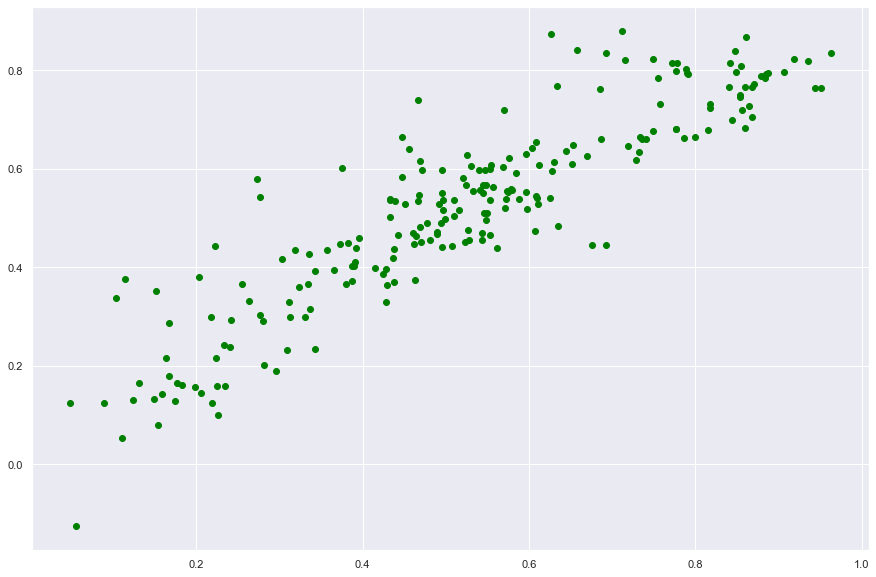

In [82]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred,color='green')
plt.show()

#### y_test VS y_pred

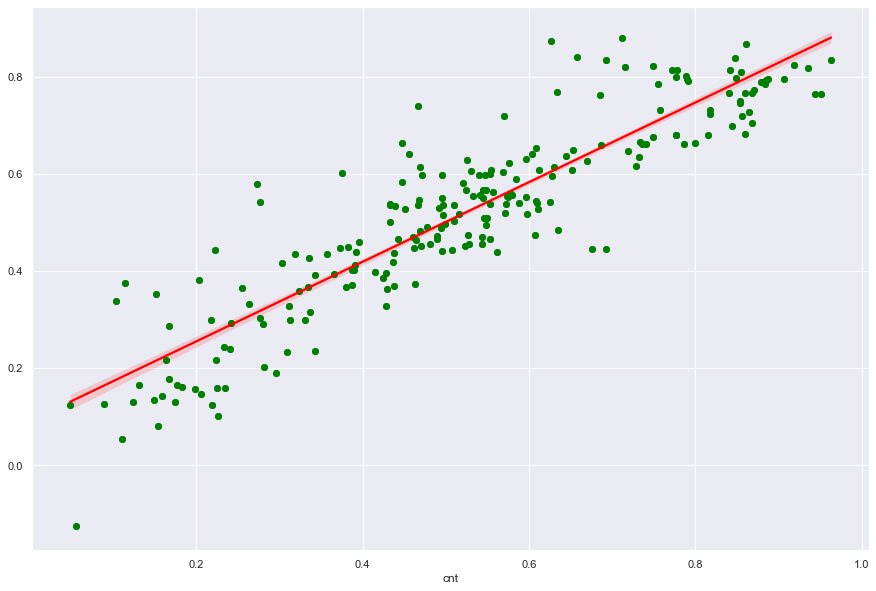

In [83]:
plt.figure(figsize=(15,10))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.scatter(y_test,y_pred,color='green')
plt.show()

cnt = temp (0.5038) + yr (0.2329) + winter (0.0829) + summer (0.0379) + sep (0.0766) - spring (0.0778) - mist and cloudy (0.0785) - light snow (0.2995) - sun (0.0449) - july (0.0485 )

TRAIN 
Rsquared           - 0.824
Adjusted Rsquared  - 0.820

TEST 
Rsquared           - 0.8101118623591823
Adjusted Rsquared  - 0.7890131111111112

Train rsq - Test rsq = 0.824 - 0.8101118623591823 ≈ 1.4 %
Train adj rsq - Test adj rsq = 0.820 - 0.7890131111111112 ≈ 3.1 %

#### Conclusions

- Adj Rsq is less than 5%, so model proves good
- Temperature's coefficient is the highest with 0.5038 
- Variables with negative coefficients are spring, mist and cloud, light snow, sun, july
- Temperature is the important variable that needs to be considered
- Year 2019 had more demand than in 2018
- Wednesday, Thursday and Saturday has high demand